In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from keras.models import Sequential
import tensorflow as tf

from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
print(" tensorflow version ", tf.__version__)
print(" Opencv version ", cv2.__version__)


 tensorflow version  2.8.2
 Opencv version  4.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/home/pi/Desktop/rec' # change path according to drive

In [ ]:
import random
ran = random.sample(range(26),26)
#ran = [0,1,10,11,9,2,3,4,5,6,17,16,15,14,7,8,9,12,13]  #0,1,4,5,8
#ran2 = [5,6,7,8,9]

print(ran)
#print(ran2)

[17, 5, 20, 0, 19, 4, 16, 9, 11, 7, 13, 24, 3, 23, 21, 1, 6, 2, 14, 25, 10, 15, 22, 12, 8, 18]


In [ ]:
def myround(x, base=50):
    return base * round(x/base)

def scaledata(x):
  y = (x - 1100)/1000
  y = float("{0:.2f}".format(y))
  return y
a = 1100
for i in range(0,(21)):
  y = (a - 1100)/1000
  y = float("{0:.2f}".format(y))
  print(y)
  y = (y * 1000) + 1100
  y = myround(y)
  print(y)
  a += 50


0.0
1100
0.05
1150
0.1
1200
0.15
1250
0.2
1300
0.25
1350
0.3
1400
0.35
1450
0.4
1500
0.45
1550
0.5
1600
0.55
1650
0.6
1700
0.65
1750
0.7
1800
0.75
1850
0.8
1900
0.85
1950
0.9
2000
0.95
2050
1.0
2100


In [ ]:
import re
import random


count=0
Images=[]
steering_angle=[]
imagecounter = 0
totalimg = 0

right_str = 0
right_str1 = 0
right_str2 = 0
right_str3 = 0
right_str4 = 0
right_str5 = 0
right_str6 = 0
mid_str = 0
left_str = 0
left_str1 = 0
left_str2 = 0
left_str3 = 0
left_str4 = 0
left_str5 = 0
left_str6 = 0
Images_path = []
Xx = []
Yy = []
DATAlist = os.listdir(path)
print("Name of the folders found" ,DATAlist)
print("Importing Classes .....")
noofclasses=len(DATAlist)
for i in range(0,(26)):
    mypics=os.listdir(path + "/fold"+ str(ran[count]))
    for y in mypics:
        current=cv2.imread(str(path)+'/'+'fold'+ str(ran[count])+ '/'+ str(y))
        keep = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", (y))
        check = int(keep[1])
        ''' To normalize data
        if(check == 1100):
          if(right_str <= 3000): #2200
            right_str += 1
            Images.append(current)
            steering_angle.append(scaledata(check))
            Xx.append(totalimg)
            Yy.append(str(scaledata(check)))
            Images_path.append(str(str(path)+'/'+'fold'+ str(count)+ '/'+ str(y)))
            imagecounter += 1
            totalimg += 1
        elif(check == 1600):
          if(mid_str <= 3000):   #2400
            mid_str += 1
            Images.append(current)
            steering_angle.append(scaledata(check))
            Xx.append(totalimg)
            Yy.append(str(scaledata(check)))
            Images_path.append(str(str(path)+'/'+'fold'+ str(count)+ '/'+ str(y)))
            imagecounter += 1
            totalimg += 1
        elif(check == 2100):
          if(left_str <= 3000): #2200
            left_str += 1
            Images.append(current)
            steering_angle.append(scaledata(check))
            Xx.append(totalimg)
            Yy.append(str(scaledata(check)))
            Images_path.append(str(str(path)+'/'+'fold'+ str(count)+ '/'+ str(y)))
            imagecounter += 1
            totalimg += 1

        elif(check != 1100 or check!= 1600 or check!= 2100):
          Images.append(current)
          steering_angle.append(scaledata(check))
          Xx.append(totalimg)
          Yy.append(str(scaledata(check)))
          Images_path.append(str(str(path)+'/'+'fold'+ str(count)+ '/'+ str(y)))
          imagecounter += 1
          totalimg += 1
        '''
        Images.append(current)
        steering_angle.append(scaledata(check))
        Xx.append(totalimg)
        Yy.append(str(scaledata(check)))
        Images_path.append(str(str(path)+'/'+'fold'+ str(count)+ '/'+ str(y)))
        imagecounter += 1
        totalimg += 1



    print("folder  " + str(ran[count]) + "    added  " + str(imagecounter) + "  images")
    imagecounter = 0 #reset iamge counter for each file after it is printed
    count = count + 1


print("Total img found " + str(totalimg))

Images=np.array(Images)
steering_angle=np.array(steering_angle)
print(Images.shape)




Name of the folders found ['fold1', 'fold2', 'fold0', 'fold4', 'fold7', 'fold6', 'fold3', 'fold5', 'fold8', 'fold9', 'fold10', 'fold13', 'fold11', 'fold12', 'fold15', 'fold14', 'fold17', 'fold16', 'fold22', 'fold20', 'fold19', 'fold21', 'fold23', 'fold18', 'fold24', 'fold27', 'fold25', 'fold26']
Importing Classes .....
folder  17    added  3116  images
folder  5    added  2835  images
folder  20    added  3916  images
folder  0    added  4144  images
folder  19    added  1030  images
folder  4    added  3016  images
folder  16    added  2015  images
folder  9    added  2672  images
folder  11    added  3211  images
folder  7    added  2214  images
folder  13    added  2822  images
folder  24    added  2554  images
folder  3    added  3231  images
folder  23    added  3857  images
folder  21    added  5657  images
folder  1    added  2305  images
folder  6    added  2838  images
folder  2    added  3148  images
folder  14    added  3906  images
folder  25    added  6106  images
folder  

In [ ]:
import seaborn as sns

#dfplot = pd.DataFrame({'noimg': Xx, 'path': Images_path, 'steering': Yy}) #for plotting dataframe
dfplot = pd.DataFrame({'noimg': Xx,'steering': Yy}) #for plotting dataframe


countlist = []
countlist.append(dfplot['steering'].value_counts()['0.0'])
countlist.append(dfplot['steering'].value_counts()['0.05'])
countlist.append(dfplot['steering'].value_counts()['0.1'])
countlist.append(dfplot['steering'].value_counts()['0.15'])
countlist.append(dfplot['steering'].value_counts()['0.2'])
countlist.append(dfplot['steering'].value_counts()['0.25'])
countlist.append(dfplot['steering'].value_counts()['0.3'])
countlist.append(dfplot['steering'].value_counts()['0.35'])
countlist.append(dfplot['steering'].value_counts()['0.4'])
countlist.append(dfplot['steering'].value_counts()['0.45'])
countlist.append(dfplot['steering'].value_counts()['0.5'])
countlist.append(dfplot['steering'].value_counts()['0.55'])
countlist.append(dfplot['steering'].value_counts()['0.6'])
countlist.append(dfplot['steering'].value_counts()['0.65'])
countlist.append(dfplot['steering'].value_counts()['0.7'])
countlist.append(dfplot['steering'].value_counts()['0.75'])
countlist.append(dfplot['steering'].value_counts()['0.8'])
countlist.append(dfplot['steering'].value_counts()['0.85'])
countlist.append(dfplot['steering'].value_counts()['0.9'])
countlist.append(dfplot['steering'].value_counts()['0.95'])
countlist.append(dfplot['steering'].value_counts()['1.0'])



print(countlist)

dfvis = pd.DataFrame({'images': countlist, 'steering': ['0.0','0.05','0.1', '0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5','0.55','0.6','0.65','0.7','0.75','0.8','0.85','0.9','0.95','1'] })
print(dfvis)


[42257, 1318, 1974, 1686, 1661, 1611, 1416, 1081, 1154, 883, 9427, 960, 1285, 1257, 1714, 1408, 1854, 1727, 1801, 1654, 6601]
    images steering
0    42257      0.0
1     1318     0.05
2     1974      0.1
3     1686     0.15
4     1661      0.2
5     1611     0.25
6     1416      0.3
7     1081     0.35
8     1154      0.4
9      883     0.45
10    9427      0.5
11     960     0.55
12    1285      0.6
13    1257     0.65
14    1714      0.7
15    1408     0.75
16    1854      0.8
17    1727     0.85
18    1801      0.9
19    1654     0.95
20    6601        1


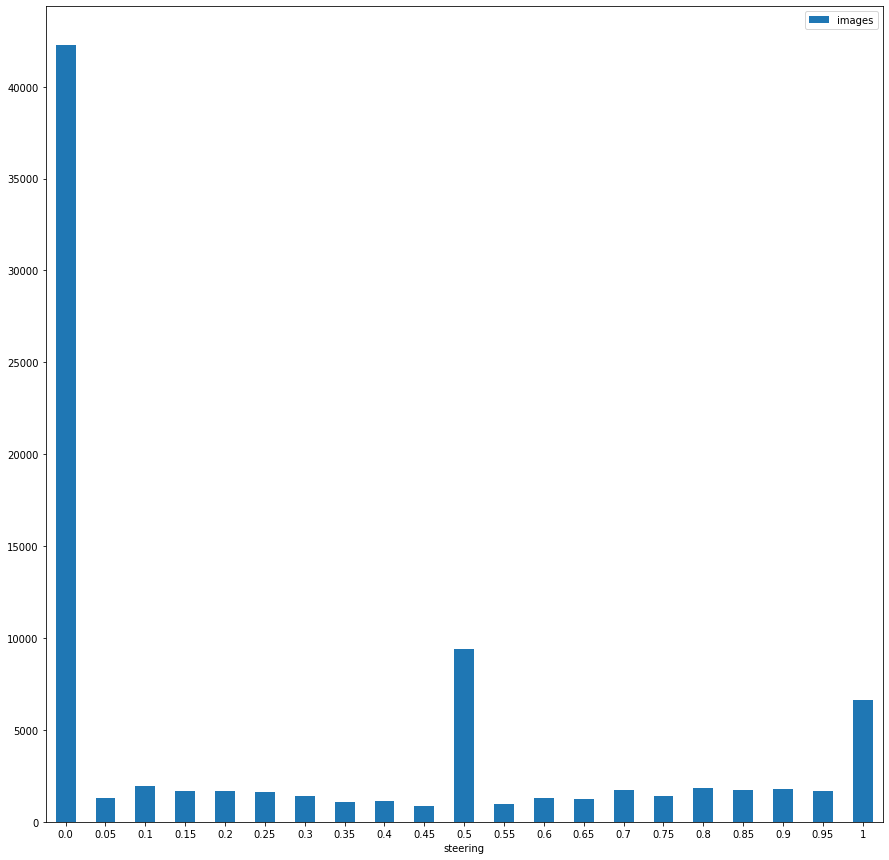

In [ ]:
#plt.figure(figsize=(100,100))
ax = dfvis.plot.bar(x = 'steering', y = 'images', rot = 0)
plt.gcf().set_size_inches(15, 15)
#dfplot.plot(x ='steering', y='noimg', kind = 'bar')
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Images,steering_angle,test_size=0.2, random_state=42) #test ratio
X_train, X_validation ,Y_train, Y_validation = train_test_split(X_train,Y_train,test_size=0.2, random_state=42) #validation ratio

print("DATA SHAPES")
print("Train:  ")
print(X_train.shape,Y_train.shape)
print("Validation:   ")
print(X_validation.shape, Y_validation.shape)
print("Test:  ")
print(X_test.shape,Y_test.shape)


DATA SHAPES
Train:  
(23166, 66, 200, 3) (23166,)
Validation:   
(5792, 66, 200, 3) (5792,)
Test:  
(7240, 66, 200, 3) (7240,)


(-0.5, 199.5, 65.5, -0.5)

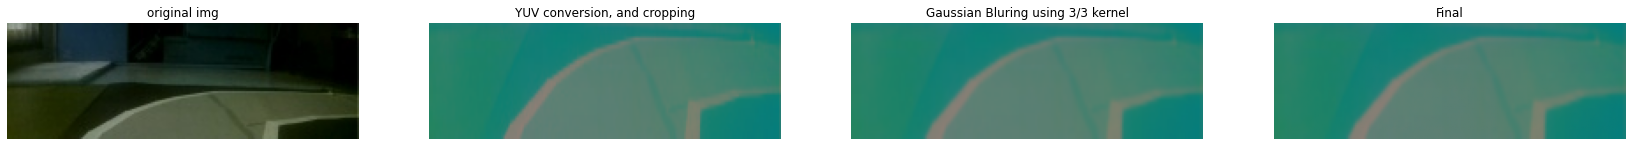

In [ ]:
from sklearn.preprocessing import Binarizer

def YUV_pro(img):
    img = img[35:80, :, :]
    img=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img = cv2.resize(img, (200, 66))
    return img
def Gausblur(img):
    img=cv2.GaussianBlur(img, (3,3), 0)
    return img
def preprocessing(img):
    img=YUV_pro(img)
    img=Gausblur(img)
    img = img/255.0
    return img

#Sample of the three function
imggrab = cv2.imread('/content/drive/MyDrive/home/pi/Desktop/rec/fold18/image0_0.jpg')

YUV_eg = YUV_pro(imggrab)
gauss_eg= Gausblur(YUV_eg)
imgpre_eg = preprocessing(imggrab)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(29,29))


imy = ax1.imshow(imggrab)                   ###Display
ax1.set_title("original img")
ax1.axis('off')

imy = ax2.imshow(YUV_eg)                   ###Display
ax2.set_title("YUV conversion, and cropping")
ax2.axis('off')

imy = ax3.imshow(gauss_eg)                   ###Display
ax3.set_title("Gaussian Bluring using 3/3 kernel")
ax3.axis('off')

imy = ax4.imshow(imgpre_eg)                   ###Display
ax4.set_title("Final")
ax4.axis('off')

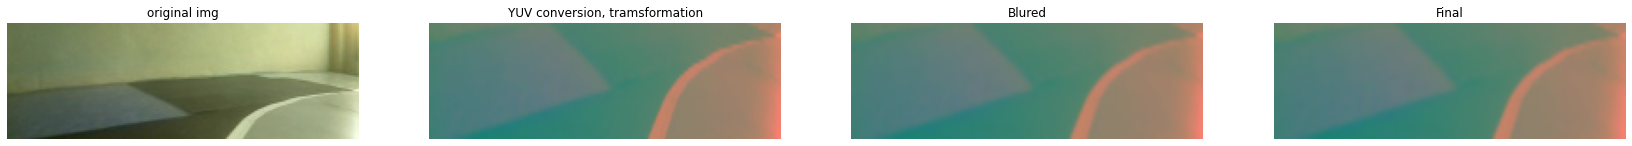

In [ ]:
from sklearn.preprocessing import Binarizer

def YUV_pro(img):
    img = img[35:80, :, :]
    img=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img = cv2.resize(img, (200, 66))
    return img
def Gausblur(img):
    img=cv2.GaussianBlur(img, (3,3), 0)
    return img
def preprocessing(img):
    img=YUV_pro(img)
    img=Gausblur(img)
    img = img/255.0
    return img

#Sample of the three function
imggrab = cv2.imread('/content/drive/MyDrive/home/pi/Desktop/rec/fold5/image1009_1100.jpg')

YUV_eg = YUV_pro(imggrab)
gauss_eg= Gausblur(YUV_eg)
imgpre_eg = preprocessing(imggrab)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(29,29))


imy = ax1.imshow(imggrab)                   ###Display
ax1.set_title("original img")
ax1.axis('off')

imy = ax2.imshow(YUV_eg)                   ###Display
ax2.set_title("YUV conversion, tramsformation")
ax2.axis('off')

imy = ax3.imshow(gauss_eg)                   ###Display
ax3.set_title("Blured")
ax3.axis('off')

imy = ax4.imshow(imgpre_eg)                   ###Display
ax4.set_title("Final")
ax4.axis('off')

X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

X_train=X_train.reshape(X_train.shape[0],66,200,3)
X_validation=X_validation.reshape(X_validation.shape[0],66,200,3)
X_test=X_test.reshape(X_test.shape[0],66,200,3)

datagen=ImageDataGenerator(width_shift_range=0.2,
                           #height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           #brightness_range = [0.9,1.4]
                          )
datagen.fit(X_train)
batches=datagen.flow(X_train,Y_train,batch_size=1)
X_batch,Y_batch=next(batches)


In [ ]:
from keras import regularizers
from keras.layers import SpatialDropout2D

def mymodel():
    model=Sequential()
    shape = (66,200,3)
    model.add(Conv2D(24,(5,5), (2,2), input_shape = shape, activation = 'relu'))
    model.add(Conv2D(36,(5,5), (2,2), activation = 'relu'))
    model.add(Conv2D(48,(5,5), (2,2), activation = 'relu'))
    model.add(Conv2D(64,(3,3), activation = 'relu'))
    model.add(SpatialDropout2D(0.5))
    model.add(Conv2D(64,(3,3), activation = 'relu'))
    model.add(SpatialDropout2D(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,loss='mean_squared_error',  metrics=['mse'])
    return model

model=mymodel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 spatial_dropout2d (SpatialD  (None, 3, 20, 64)        0         
 ropout2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                        

In [ ]:
import tensorflow as tf
#callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_mse', patience = 4)
history=model.fit(datagen.flow(X_train,Y_train,batch_size=4),epochs=8,validation_data=(X_validation,Y_validation),shuffle=1)
score=model.evaluate(X_test,Y_test,verbose=1)
print('mse: ',score[0])

Epoch 1/8
5792/5792 [==============================] - 85s 13ms/step - loss: 0.1242 - mse: 0.1242 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 2/8
5792/5792 [==============================] - 68s 12ms/step - loss: 0.0967 - mse: 0.0967 - val_loss: 0.0749 - val_mse: 0.0749
Epoch 3/8
5792/5792 [==============================] - 68s 12ms/step - loss: 0.0864 - mse: 0.0864 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 4/8
5792/5792 [==============================] - 68s 12ms/step - loss: 0.0764 - mse: 0.0764 - val_loss: 0.0492 - val_mse: 0.0492
Epoch 5/8
5792/5792 [==============================] - 69s 12ms/step - loss: 0.0668 - mse: 0.0668 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 6/8
5792/5792 [==============================] - 68s 12ms/step - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 7/8
5792/5792 [==============================] - 69s 12ms/step - loss: 0.0560 - mse: 0.0560 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 8/8
5792/5792 [==============================] - 

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model(0023rs).tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv_6zehv8/assets
